In [ ]:
# Install necessary modules
!pip install pycaret

In [ ]:
!pip install streamlit

In [3]:
# Import necessary modules
from pycaret.regression import *
import streamlit as st
import pandas as pd
import numpy as np
from pycaret.datasets import get_data

In [4]:
# Load data
insurance_df = pd.read_csv('insurance_data.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
minValues = print(insurance_df.min())

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges     1121.8739
dtype: object


In [9]:
maxValues = print(insurance_df.max())

age                  64
sex                male
bmi               53.13
children              5
smoker              yes
region        southwest
charges     63770.42801
dtype: object


In [10]:
ins = setup(insurance_df, target = 'charges', use_gpu = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


INFO:logs:create_model_container: 0
2022-09-25 14:06:32.071 INFO    logs: create_model_container: 0
INFO:logs:master_model_container: 0
2022-09-25 14:06:32.075 INFO    logs: master_model_container: 0
INFO:logs:display_container: 1
2022-09-25 14:06:32.077 INFO    logs: display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('scaling

In [11]:
ins_best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2703.5150,2.325053e+07,4802.3841,0.8347,0.4397,0.3114,0.089
rf,Random Forest Regressor,2743.9004,2.499208e+07,4983.2708,0.8204,0.4667,0.3283,1.320
lightgbm,Light Gradient Boosting Machine,2959.5584,2.523648e+07,5013.0892,0.8171,0.5427,0.3685,0.054
ada,AdaBoost Regressor,4162.2323,2.832826e+07,5316.6146,0.7985,0.6349,0.7263,0.028
et,Extra Trees Regressor,2799.2800,2.904050e+07,5361.0342,0.7952,0.4924,0.3372,0.813
llar,Lasso Least Angle Regression,4315.7895,3.835598e+07,6173.8739,0.7311,0.6105,0.4415,0.028
ridge,Ridge Regression,4336.2308,3.838150e+07,6175.9542,0.7309,0.6193,0.4454,0.012
lasso,Lasso Regression,4323.0688,3.837514e+07,6175.3800,0.7308,0.6140,0.4431,0.012
br,Bayesian Ridge,4333.6881,3.838167e+07,6175.9476,0.7308,0.6151,0.4450,0.024
lr,Linear Regression,4323.6138,3.838006e+07,6175.7165,0.7308,0.6175,0.4432,0.011


INFO:logs:create_model_container: 18
2022-09-25 14:07:10.122 INFO    logs: create_model_container: 18
INFO:logs:master_model_container: 18
2022-09-25 14:07:10.129 INFO    logs: master_model_container: 18
INFO:logs:display_container: 2
2022-09-25 14:07:10.135 INFO    logs: display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
2022-09-25 14:07:10.138 INFO   

In [12]:
ins_gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2726.1095,2.157265e+07,4644.6365,0.8712,0.4412,0.3314
1,3020.0189,3.204614e+07,5660.9310,0.8137,0.4542,0.2880
2,2554.0978,2.132452e+07,4617.8481,0.7300,0.4760,0.3072
3,2830.5469,2.178529e+07,4667.4717,0.8181,0.4471,0.3480
4,2888.2098,2.729166e+07,5224.1422,0.7970,0.5195,0.3473
5,2522.7354,1.872168e+07,4326.8562,0.8796,0.3360,0.2348
6,2489.0907,1.985561e+07,4455.9637,0.8649,0.3574,0.2832
7,2709.6859,2.481789e+07,4981.7554,0.8635,0.4281,0.2666
8,2335.3814,1.785566e+07,4225.5957,0.8847,0.3996,0.3157


INFO:logs:create_model_container: 19
2022-09-25 14:07:11.315 INFO    logs: create_model_container: 19
INFO:logs:master_model_container: 19
2022-09-25 14:07:11.324 INFO    logs: master_model_container: 19
INFO:logs:display_container: 3
2022-09-25 14:07:11.326 INFO    logs: display_container: 3
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
2022-09-25 14:07:11.330 INFO   

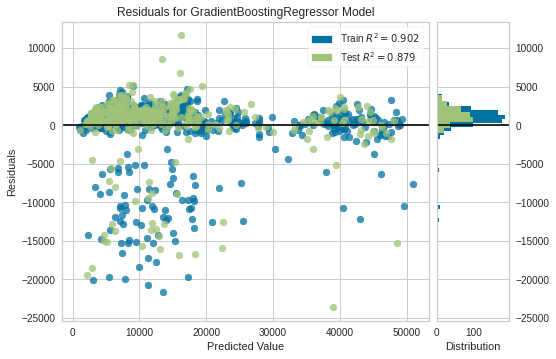

INFO:logs:Visual Rendered Successfully
2022-09-25 14:07:12.251 INFO    logs: Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
2022-09-25 14:07:12.369 INFO    logs: plot_model() succesfully completed......................................


In [13]:
plot_model(ins_gbr)

In [14]:
#Applying preprocessing techniques
ins2 = setup(insurance_df, target = 'charges', session_id = 123, use_gpu = True,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


INFO:logs:create_model_container: 0
2022-09-25 14:07:33.819 INFO    logs: create_model_container: 0
INFO:logs:master_model_container: 0
2022-09-25 14:07:33.823 INFO    logs: master_model_container: 0
INFO:logs:display_container: 1
2022-09-25 14:07:33.826 INFO    logs: display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('dummy',

In [15]:
ins_best2 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.772562e+03,2.431122e+07,4.910626e+03,8.244000e-01,0.4524,0.3349,0.217
br,Bayesian Ridge,3.189695e+03,2.559819e+07,5.044324e+03,8.189000e-01,0.4565,0.3402,0.029
ridge,Ridge Regression,3.187481e+03,2.564871e+07,5.049128e+03,8.186000e-01,0.4702,0.3397,0.013
lasso,Lasso Regression,3.186325e+03,2.575431e+07,5.059555e+03,8.181000e-01,0.4838,0.3397,0.030
lr,Linear Regression,3.193787e+03,2.577412e+07,5.061833e+03,8.179000e-01,0.4544,0.3410,0.012
llar,Lasso Least Angle Regression,3.228231e+03,2.611664e+07,5.098293e+03,8.156000e-01,0.4636,0.3734,0.028
lightgbm,Light Gradient Boosting Machine,3.032741e+03,2.592786e+07,5.080393e+03,8.134000e-01,0.5063,0.3655,0.101
omp,Orthogonal Matching Pursuit,3.202213e+03,2.667869e+07,5.146621e+03,8.128000e-01,0.4396,0.3365,0.015
rf,Random Forest Regressor,2.858084e+03,2.647857e+07,5.129972e+03,8.094000e-01,0.4922,0.3624,1.178
huber,Huber Regressor,2.099010e+03,2.798313e+07,5.269345e+03,8.040000e-01,0.3975,0.0829,0.098


INFO:logs:create_model_container: 18
2022-09-25 14:08:11.644 INFO    logs: create_model_container: 18
INFO:logs:master_model_container: 18
2022-09-25 14:08:11.651 INFO    logs: master_model_container: 18
INFO:logs:display_container: 2
2022-09-25 14:08:11.655 INFO    logs: display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
2022-09-25 14:08:11.661 INFO   

In [16]:
ins_gbr2 = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2544.1407,1.980116e+07,4449.8496,0.8817,0.4146,0.3002
1,3129.8378,3.287670e+07,5733.8205,0.8088,0.4614,0.3163
2,2920.2706,2.705713e+07,5201.6469,0.6574,0.5495,0.4237
3,2840.9165,2.074859e+07,4555.0616,0.8268,0.4680,0.4051
4,2975.9255,2.824483e+07,5314.5864,0.7899,0.4651,0.2942
5,2501.5561,1.850066e+07,4301.2396,0.8810,0.3288,0.2265
6,2642.3751,2.103786e+07,4586.7043,0.8568,0.3950,0.3277
7,2711.6491,2.537717e+07,5037.5755,0.8605,0.4446,0.2845
8,2510.0341,2.153573e+07,4640.6610,0.8609,0.4267,0.3351


INFO:logs:create_model_container: 19
2022-09-25 14:08:14.281 INFO    logs: create_model_container: 19
INFO:logs:master_model_container: 19
2022-09-25 14:08:14.289 INFO    logs: master_model_container: 19
INFO:logs:display_container: 3
2022-09-25 14:08:14.297 INFO    logs: display_container: 3
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
2022-09-25 14:08:14.302 INFO   

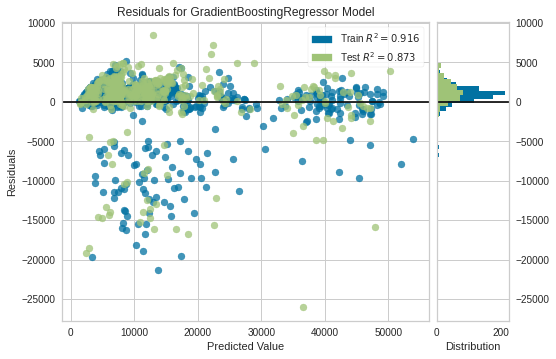

INFO:logs:Visual Rendered Successfully
2022-09-25 14:08:15.060 INFO    logs: Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
2022-09-25 14:08:15.180 INFO    logs: plot_model() succesfully completed......................................


In [17]:
plot_model(ins_gbr2)

In [18]:
save_model(ins_gbr2, 'ins_deployment_model')

INFO:logs:Initializing save_model()
2022-09-25 14:08:15.206 INFO    logs: Initializing save_model()
INFO:logs:save_model(model=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), model_name=ins_deployment_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           

In [19]:
deployment_28042020 = load_model('ins_deployment_model')

INFO:logs:Initializing load_model()
2022-09-25 14:08:15.402 INFO    logs: Initializing load_model()
INFO:logs:load_model(model_name=ins_deployment_model, platform=None, authentication=None, verbose=True)
2022-09-25 14:08:15.410 INFO    logs: load_model(model_name=ins_deployment_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [21]:
#Deploying the trained model with streamlit
from pycaret.regression import load_model, predict_model
import streamlit as st
import pandas as pd
import numpy as np

model = load_model('ins_deployment_model')

def predict(model, input_df):
    predictions_df = predict_model(estimator=model, data=input_df)
    predictions = predictions_df['Label'][0]
    return predictions

def run():

    from PIL import Image
    #image = Image.open('logo.png')
    #image_hospital = Image.open('hospital.jpg')

    #st.image(image,use_column_width=False)

    add_selectbox = st.sidebar.selectbox(
    "How would you like to predict?",
    ("Online", "Batch"))

    st.sidebar.info('This app is created to predict patient hospital insurance charges')
    #st.sidebar.success('https://www.pycaret.org')
    
    #st.sidebar.image(image_hospital)

    st.title("Insurance Charges Prediction Framework")

    if add_selectbox == 'Online':

        #age = st.number_input('Age', min_value=1, max_value=100, value=25)
        age = st.sidebar.slider('Age', min_value=1, max_value=100, value=15, step = 1)
        sex = st.selectbox('Sex', ['male', 'female'])
        bmi = st.sidebar.slider('BMI', min_value=10, max_value=80, value=20, step = 1)
        #children = st.selectbox('Children', [0,1,2,3,4,5,6,7,8,9,10])
        children = st.sidebar.slider('Children', min_value=0, max_value=10, value=0, step = 1)
        if st.checkbox('Smoker'):
            smoker = 'yes'
        else:
            smoker = 'no'
        region = st.selectbox('Region', ['southwest', 'northwest', 'northeast', 'southeast'])

        output=""

        input_dict = {'age' : age, 'sex' : sex, 'bmi' : bmi, 'children' : children, 'smoker' : smoker, 'region' : region}
        input_df = pd.DataFrame([input_dict])

        if st.button("Predict"):
            output = predict(model=model, input_df=input_df)
            output = '$' + str(output)

        st.success('The output is {}'.format(output))

    if add_selectbox == 'Batch':

        file_upload = st.file_uploader("Upload csv file for predictions", type=["csv"])

        if file_upload is not None:
            data = pd.read_csv(file_upload)
            predictions = predict_model(estimator=model,data=data)
            st.write(predictions)

if __name__ == '__main__':
    run()

INFO:logs:Initializing load_model()
2022-09-25 14:20:28.354 Initializing load_model()
INFO:logs:load_model(model_name=ins_deployment_model, platform=None, authentication=None, verbose=True)
2022-09-25 14:20:28.357 load_model(model_name=ins_deployment_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
